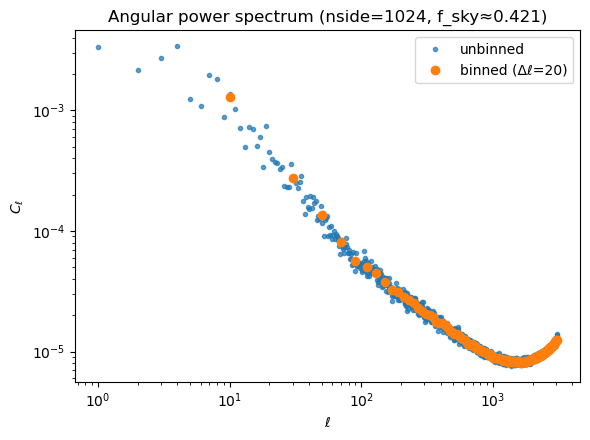

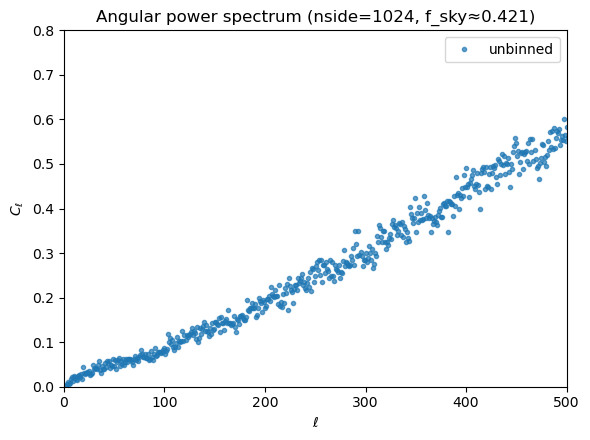

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import healpy as hp
import fitsio
from astropy.table import Table
import scienceplots
plt.style.use(['default'])
%run /user/animesh.sah/DESI_PECVEL/Cll.ipynb


In [2]:
fmask='../data/Legacy_footprint_final_mask.fits'
mask_loaded=hp.read_map(fmask)
fmask='../data/Legacy_footprint_completeness_mask_128.fits'#final mask
weight=hp.read_map(fmask)
weight_init=weight
weight=weight*mask_loaded
nside=1024
print('nside=%d'%nside)
ipix=np.arange(12*nside**2)
mapra,mapdec=hp.pix2ang(nside,ipix,lonlat=True)
masked_pix=ipix[mask_loaded.astype(bool)]
totmask=sum(mask_loaded)

npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
dec= np.degrees(0.5*np.pi - theta)
mask_loaded[dec<-30]=0
weight[dec<-30]=0

nside=1024


In [3]:
import pickle


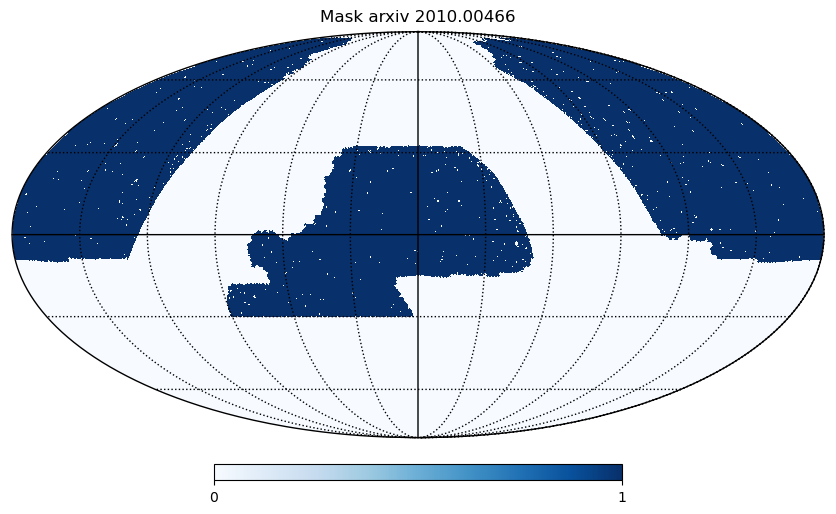

In [4]:
hp.mollview(mask_loaded, title="Mask arxiv 2010.00466", cmap='Blues', nest=False,norm='hist')
hp.graticule()

In [5]:
mask = np.load('mask_33times.npy')
#mask=np.load('mask_16times.npy')
#mask=np.load('mask_3.3times.npy')
mask=np.load('mask_dense.npy')

In [6]:
np.where(mask_loaded), len(np.where(mask)[0])

((array([  29217,   29225,   29233, ..., 9432070, 9432071, 9432072]),),
 5301093)

In [7]:
np.where(weight), len(np.where(weight)[0])

((array([  29217,   29225,   29233, ..., 9432070, 9432071, 9432072]),),
 4705772)

In [8]:
np.where(np.where(mask_loaded)[0] != np.where(weight)[0])
print('Weight and mask have same indexes of non zero elements')

Weight and mask have same indexes of non zero elements


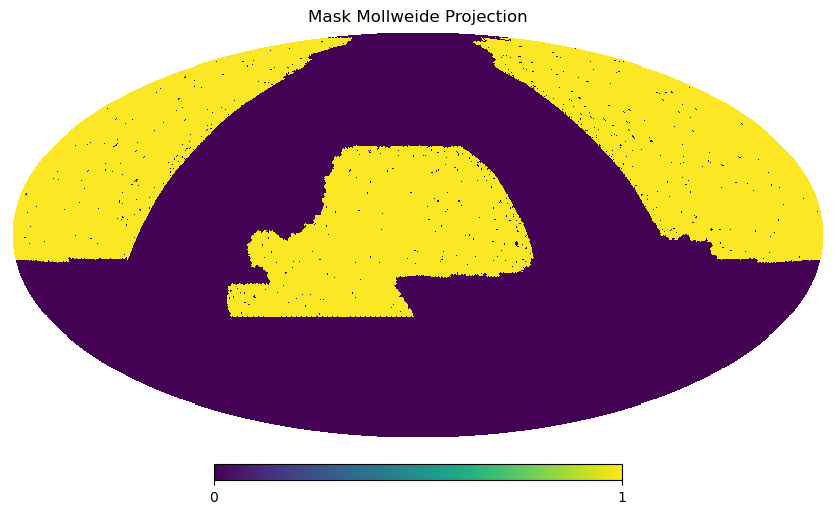

In [105]:
hp.mollview(mask_loaded, title="Mask Mollweide Projection", cmap='viridis', nest=False)

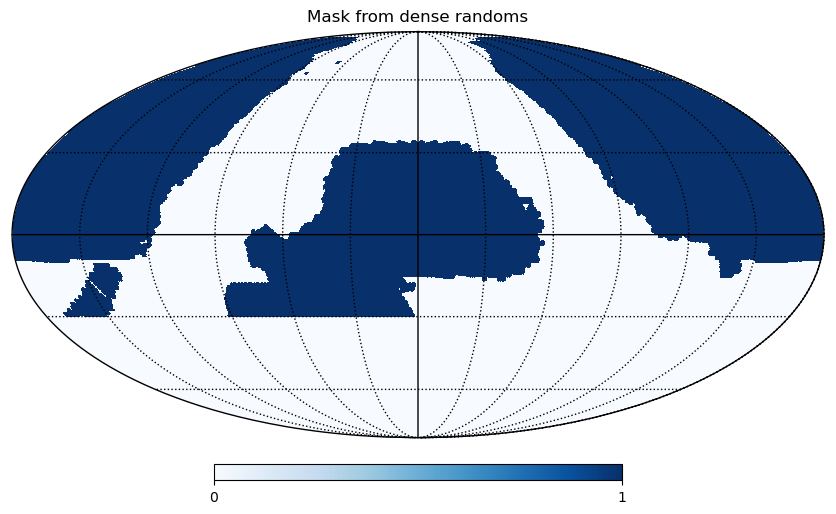

In [9]:
hp.mollview(mask, title="Mask from dense randoms", cmap='Blues', nest=False)
hp.graticule()

In [108]:

mask

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
tot1=np.sum(mask)
tot2=np.sum(data_map)
fsky=tot1/npix
rntot1=np.copy(tot2)
lmax=500
nell=10
xx=np.zeros(lmax+1)
nbins=lmax/nell
ll=np.arange(0,lmax+1)

In [11]:
map1=mask*(data_map*tot1/tot2 - 1)
a1=hp.map2alm(map1,lmax=lmax)
print(a1)
p1=hp.alm2cl(a1)

dl1=ll*(ll+1)/2/np.pi*p1/fsky


[-2.48538857e-05+0.j          3.10700620e-02+0.j
 -6.56360620e-03+0.j         ... -3.53979543e-03-0.00215051j
  8.82624404e-05+0.00394576j -5.50974342e-03-0.0013158j ]


In [12]:
dl2=np.zeros(lmax+1)
for i in range(lmax):
    xx[i]=i
    dl2[i]=i*(i+1)*p1[i]/2./np.pi
    dl2[i]=dl2[i]/fsky


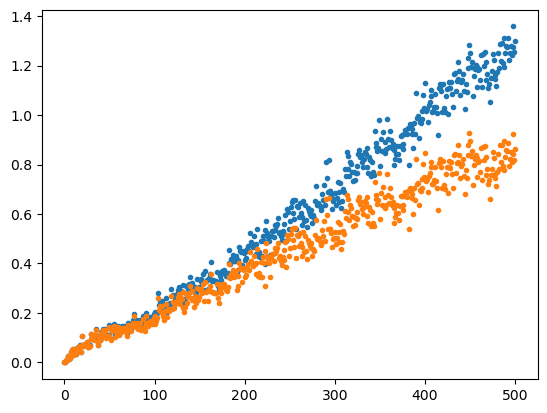

In [16]:
pshot=2*fsky*ll*(1+ll)/rntot1
plt.plot(dl1,'.')
dl1=dl1-pshot
plt.plot(dl1,'.')

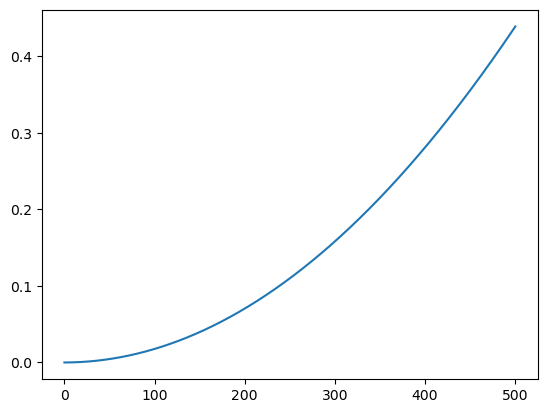

In [17]:
plt.plot(pshot)

In [18]:
p1

array([6.17715635e-10, 3.21886237e-03, 2.05117078e-03, 2.69445025e-03,
       3.31834630e-03, 1.24214380e-03, 1.08686512e-03, 1.94100303e-03,
       1.83818949e-03, 8.72624756e-04, 1.35557239e-03, 1.00607806e-03,
       6.95159694e-04, 4.89387200e-04, 7.13640219e-04, 7.04186788e-04,
       5.00277015e-04, 5.94204926e-04, 3.36427629e-04, 7.36205138e-04,
       4.42593430e-04, 3.83377425e-04, 3.67675401e-04, 3.55578441e-04,
       3.25481004e-04, 3.41027595e-04, 2.33991580e-04, 2.28714470e-04,
       2.24216009e-04, 3.53102148e-04, 2.71574338e-04, 2.63687625e-04,
       2.44349678e-04, 2.23534680e-04, 2.49413870e-04, 2.82329326e-04,
       1.77443328e-04, 1.34383630e-04, 1.90418438e-04, 1.56222527e-04,
       1.48987724e-04, 1.89795436e-04, 1.52725380e-04, 1.89240789e-04,
       1.66884436e-04, 1.72813977e-04, 1.23871656e-04, 1.31794215e-04,
       1.23902898e-04, 1.61560789e-04, 1.17093160e-04, 1.40972940e-04,
       9.13773114e-05, 1.20601825e-04, 1.25100952e-04, 1.32160319e-04,
      

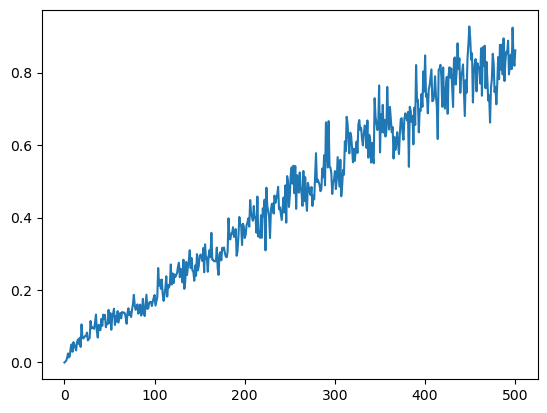

In [19]:
p1=dl1
nbins=int(nbins)
plt.plot(p1)

In [20]:
nbins

50

In [ ]:
xb2=np.zeros(nbins)
yb2=np.zeros(nbins)
xe2=np.zeros(nbins)
ye2=np.zeros(nbins)
xb1=np.zeros(nbins)
yb1=np.zeros(nbins)
xe1=np.zeros(nbins)
ye1=np.zeros(nbins)

results1=np.zeros((nbins,2))
results3=np.zeros((nbins,2))
results5=np.zeros((nbins,2))
results6=np.zeros((nbins,2))
larray=[]
l2arr=[]
for i in range(nbins):
        tot=0
        tot2=0
        for j in range(nell):
            #!
            k=nell*i+j#+5
            #print(k)

            tot=tot+p1[k]
            tot2=tot2+p1[k]**2
        print(tot)
        larray.append(tot)
        #l2arr.append(k)
        tot=tot/float(nell)
        tot2=np.sqrt(tot2/float(nell) - tot*tot)
        #!
        xb2[i]=(i+0.5)*nell#+5
        #print((i+0.5)*nell)
        #print((i+0.5)*nell)
        yb2[i]=tot
        xe2[i]=nell/2.
        nmodes=nell*(2*xb2[i]+1)/2.
        ye2[i]=tot2/np.sqrt(nell-1)/np.sqrt(fsky)
        #ye2[i]=tot2/np.sqrt(nmodes)/np.sqrt(fsky)
        #shot noise subtraction
results3=np.zeros((nbins,2))
for i in range(nbins):

        pshot=2*fsky*xb2[i]*(1+xb2[i])/rntot1
        yb2[i]=yb2[i]-pshot
        l2arr.append(pshot)
        results3[i,0]=yb2[i]
        results3[i,1]=ye2[i]
    
    #!
l=(np.arange(nbins)+0.5)*nell#+5
#results3


0.19584324737687825
0.5667451929448809
0.7402030294663206
0.9707131382522136
1.152704863092381
1.2303989532053061
1.2741405074619738
1.4786089562449258
1.4570245911600752
1.6444440518949348
2.014391956461923
2.1063971259084746
2.4673324371514
2.560725601796529
2.6048909742641815
2.879863195186366
2.9765652084909795
2.9243260822684283
3.457799401336037
3.5611856828100095
3.8863272555822514
3.8502734148416318
4.085247345184635
4.439597880554605
4.41635009940549
5.017832131698042
4.728824269467143
4.831111209639366
5.049478681954798
5.531206023375917
5.127107941903447
6.08470171640685
6.085754858735024
6.215919754268395
6.402493656100135
6.615829469606976
6.312115644133207
6.44487779731645
6.604495530348128
7.291903451255654
7.567753312674122
7.519841914120526
7.671096200590042
7.991872689257075
8.018159508951657
8.1453214138133
8.118919050129866
7.558559886332045
8.254297078230255
8.457768999174425


In [71]:
np.array(larray)

array([0.19584325, 0.56674519, 0.74020303, 0.97071314, 1.15270486,
       1.23039895, 1.27414051, 1.47860896, 1.45702459, 1.64444405,
       2.01439196, 2.10639713, 2.46733244, 2.5607256 , 2.60489097,
       2.8798632 , 2.97656521, 2.92432608, 3.4577994 , 3.56118568,
       3.88632726, 3.85027341, 4.08524735, 4.43959788, 4.4163501 ,
       5.01783213, 4.72882427, 4.83111121, 5.04947868, 5.53120602,
       5.12710794, 6.08470172, 6.08575486, 6.21591975, 6.40249366,
       6.61582947, 6.31211564, 6.4448778 , 6.60449553, 7.29190345,
       7.56775331, 7.51984191, 7.6710962 , 7.99187269, 8.01815951,
       8.14532141, 8.11891905, 7.55855989, 8.25429708, 8.457769  ])

In [44]:
sum(p1[:10])

0.19584324737687825

In [56]:
bins = np.arange(nell, lmax, nell)
bin_centers= (bins[1:]+bins[:-1])/2
bin_centers = np.r_[bins[0]/2,bin_centers]

In [57]:
breakpoints

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500])

In [78]:
breakpoints

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490])

In [81]:
p1=p1[:-1]
breakpoints=np.arange(0,len(p1),10)
#starts = np.r_[0,breakpoints]
sums = np.add.reduceat(p1, breakpoints)
sumsq = np.add.reduceat(p1**2, breakpoints)
pshot1 = 2*fsky*bin_centers * (1+bin_centers)/rntot1

In [84]:
sums

array([0.19584325, 0.56674519, 0.74020303, 0.97071314, 1.15270486,
       1.23039895, 1.27414051, 1.47860896, 1.45702459, 1.64444405,
       2.01439196, 2.10639713, 2.46733244, 2.5607256 , 2.60489097,
       2.8798632 , 2.97656521, 2.92432608, 3.4577994 , 3.56118568,
       3.88632726, 3.85027341, 4.08524735, 4.43959788, 4.4163501 ,
       5.01783213, 4.72882427, 4.83111121, 5.04947868, 5.53120602,
       5.12710794, 6.08470172, 6.08575486, 6.21591975, 6.40249366,
       6.61582947, 6.31211564, 6.4448778 , 6.60449553, 7.29190345,
       7.56775331, 7.51984191, 7.6710962 , 7.99187269, 8.01815951,
       8.14532141, 8.11891905, 7.55855989, 8.25429708, 8.457769  ])

In [85]:
dCl = np.sqrt(sumsq/nell  - (sums**2)/nell**2)/(np.sqrt(fsky))/np.sqrt(nell-1)
Cl = sums - pshot1

ValueError: operands could not be broadcast together with shapes (50,) (49,) 

In [27]:
Cl

array([0.49118374, 0.7302745 , 0.99476896, 1.09459031, 1.2302948 ,
       1.30351149, 1.43274889, 1.46411202, 1.58167779, 1.98703721,
       2.06120533, 2.40046108, 2.4822494 , 2.61640581, 2.85834995,
       2.86748516, 2.90117529, 3.34792676, 3.47481257, 3.80238234,
       3.82321805, 3.9278504 , 4.34229147, 4.31842662, 4.82936453,
       4.70813211, 4.5483458 , 5.00526068, 5.37444612, 4.94547513,
       5.86121542, 5.85498654, 6.06115077, 6.05770488, 6.49326639,
       6.13317139, 6.16944232, 6.37868445, 6.93943292, 7.31830769,
       7.24914082, 7.26298679, 7.74157767, 7.50286365, 7.9143006 ,
       7.78547202, 7.24695253, 7.7395139 , 8.0569726 , 1.25005151])

In [26]:
results3[:,0]

array([0.01953176, 0.05625401, 0.07288143, 0.09486365, 0.1116436 ,
       0.11764338, 0.11989747, 0.13787383, 0.13289448, 0.1484651 ,
       0.18193813, 0.18726647, 0.2191374 , 0.22390369, 0.22339678,
       0.24562013, 0.24966604, 0.23846741, 0.2854896 , 0.28915266,
       0.31464083, 0.30365903, 0.31942959, 0.34678738, 0.33603492,
       0.38740502, 0.3493757 , 0.35012544, 0.36213281, 0.40012575,
       0.34918572, 0.43406445, 0.42293869, 0.42437369, 0.43109916,
       0.4401504 , 0.39714626, 0.39743929, 0.40006745, 0.45512421,
       0.46867474, 0.44949872, 0.44988884, 0.46688077, 0.4540733 ,
       0.45100291, 0.43222568, 0.35970234, 0.41243822, 0.41559714])

In [29]:
dCl

array([0.00610866, 0.00618746, 0.00830739, 0.00777186, 0.00929039,
       0.00496045, 0.0106441 , 0.00695809, 0.00765224, 0.0156647 ,
       0.01438322, 0.00892265, 0.01366519, 0.01296276, 0.01079461,
       0.01361414, 0.01269021, 0.01698005, 0.01726353, 0.01470107,
       0.01816836, 0.02604276, 0.01094644, 0.02208382, 0.02221428,
       0.01711283, 0.01423732, 0.01776974, 0.0337247 , 0.01712016,
       0.02500849, 0.01980851, 0.01539465, 0.02867547, 0.02942858,
       0.0211346 , 0.01757664, 0.02549468, 0.0282497 , 0.02232904,
       0.03071602, 0.02403874, 0.02455901, 0.02755383, 0.03023476,
       0.02359981, 0.02579961, 0.0282809 , 0.01843711, 0.17264671])

In [28]:
results3[:,1]

array([0.00811248, 0.00972305, 0.00751364, 0.00801426, 0.00863668,
       0.00908548, 0.00578293, 0.00855612, 0.00756577, 0.00595854,
       0.01533556, 0.01405168, 0.0078902 , 0.01640141, 0.01049671,
       0.01190305, 0.01216668, 0.01211018, 0.01486921, 0.01751545,
       0.01454581, 0.01946054, 0.02425331, 0.01056082, 0.02207241,
       0.01938246, 0.01880312, 0.01988067, 0.01427335, 0.03310258,
       0.01737914, 0.02205283, 0.02082535, 0.01489652, 0.03567694,
       0.02476529, 0.01985677, 0.0184092 , 0.02539113, 0.02620286,
       0.02297775, 0.03128576, 0.02364716, 0.02627484, 0.03429442,
       0.02479469, 0.02419103, 0.02667126, 0.02239124, 0.01880612])

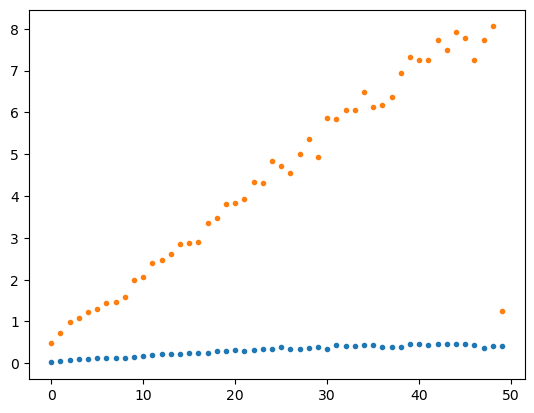

In [142]:
plt.plot(results3[:,0],'.')
plt.plot(Cl,'.')
#plt.plot(p1,'.')


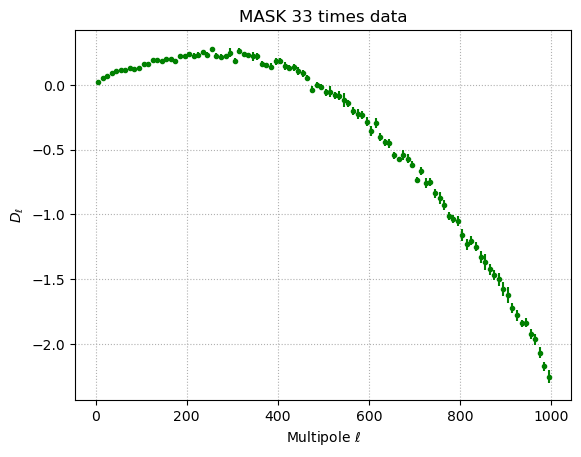

In [21]:
plt.errorbar(l,results3[:,0],yerr=results3[:,1],ls='None',marker='.',color='g')
plt.grid(ls=':')
plt.xlabel(r'Multipole $\ell$')
plt.ylabel(r'$D_\ell$')
plt.title('MASK 33 times data')
plt.savefig('33times_mask.png')
#plt.xscale('log')
#plt.yscale('symlog')

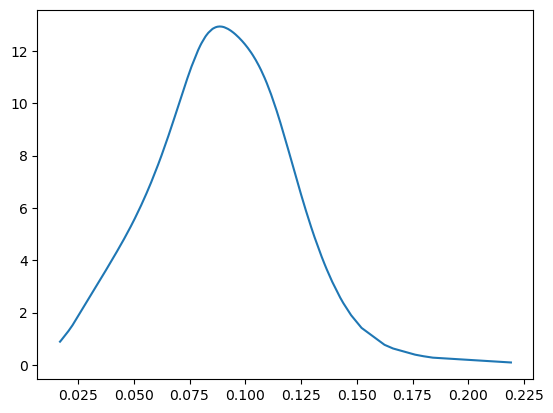

In [150]:
plt.plot(z,n_z)

In [151]:
n_z

array([ 0.89237731,  0.93077937,  1.29733215,  1.51989896,  3.30893504,
        3.61443452,  3.79341451,  3.92653908,  4.11115961,  4.330651  ,
        4.54071671,  4.81239399,  4.8165112 ,  5.28049643,  5.59655598,
        5.89275406,  6.10176787,  6.2785332 ,  6.29884844,  6.55603948,
        6.61097376,  6.69618196,  6.76337989,  6.87611268,  6.9541695 ,
        6.99157586,  6.99671834,  7.62943027,  7.66162293,  8.01129352,
        8.42515664,  8.62515908,  8.71933716,  8.75014533,  9.21016833,
        9.43470286,  9.77712394,  9.79813193,  9.80624951,  9.80800064,
       10.60196448, 10.67941638, 10.71597862, 10.80640135, 10.9019563 ,
       10.93759418, 11.39801318, 11.9416241 , 11.97056757, 12.02755554,
       12.08877037, 12.09576613, 12.18988665, 12.20481369, 12.2843973 ,
       12.28980572, 12.49605252, 12.50718897, 12.53251349, 12.5786547 ,
       12.68002201, 12.68237625, 12.68538992, 12.81498521, 12.81775371,
       12.8276175 , 12.84093275, 12.84703563, 12.85012119, 12.88

In [22]:

matched_dr=Table(fitsio.FITS('/user/animesh.sah/DESI_PECVEL/DR_matched.fits')[1].read())

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


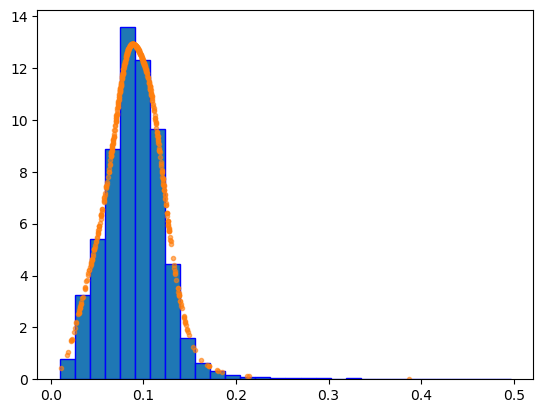

In [23]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(matched_dr['Z'],bw_method=0.25)
samples = kde.resample(500).flatten()
samples = np.clip(samples, 0, None)
y_samples=kde.evaluate(samples)
samples_sorted=np.sort(samples)
arg=np.argsort(samples)
y_samples_sorted= y_samples[arg]

plt.hist(matched_dr['Z'],bins=30,edgecolor='blue',label='DESI Spectral',density=True)

plt.plot(samples_sorted,y_samples_sorted,'.',alpha=0.6)
z=samples_sorted
n_z=y_samples_sorted
n_z /= np.trapz(y_samples_sorted, samples_sorted)



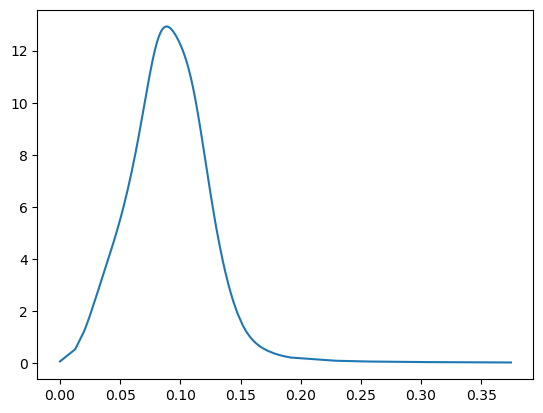

In [184]:
plt.plot(z,n_z)

In [24]:
import pyccl as ccl

cosmo = ccl.Cosmology(
    Omega_c=0.25,  # Cold dark matter density
    Omega_b=0.05,  # Baryon density
    h=0.67,        # Hubble parameter
    sigma8=0.8,    # Power spectrum normalization
    n_s=0.96       # Spectral index
)
import numpy as np

#z = np.linspace(0.01, 2.0, 100)
#n_z = np.exp(-((z-0.5)**2)/(2*0.1**2))  # example Gaussian n(z)


# Normalize
#n_z /= np.trapz(n_z, z)
z=samples_sorted
n_z = y_samples_sorted
gal_tracer = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z, n_z), bias=(z, np.ones_like(z)))
ell = np.arange(0, 300)



def dll(a,ell):
    cls_gg = ccl.angular_cl(cosmo, gal_tracer, gal_tracer, ell)
    dl=ell*(ell+1)*cls_gg/2/np.pi
    return a*dl 

#plt.plot(l, dll(1, l))

In [167]:
import matplotlib.pyplot as plt

plt.plot(ell, ell*(ell+1)*cls_gg/2/np.pi,label="Galaxy auto",)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.legend()
plt.show()

NameError: name 'cls_gg' is not defined

In [27]:
l[:30]

array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.,
       115., 125., 135., 145., 155., 165., 175., 185., 195., 205., 215.,
       225., 235., 245., 255., 265., 275., 285., 295.])

(0.0, 0.6)

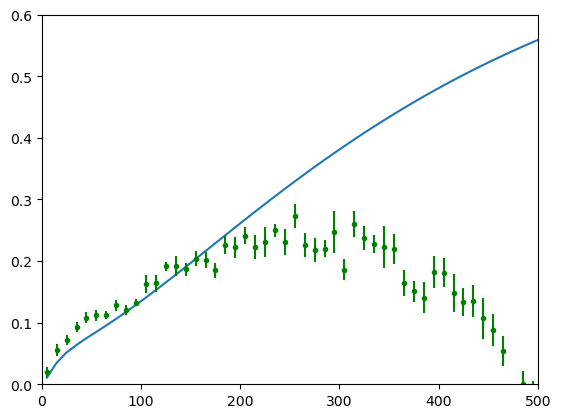

In [28]:
from scipy.optimize import curve_fit as cf
popt,pcov=cf(dll,l[:30],results3[:,0][:30],sigma=results3[:,1][:30],p0=[2])
popt
plt.plot(l,dll(*popt,l))
plt.errorbar(l,results3[:,0],yerr=results3[:,1],ls='None',marker='.',color='g')
#plt.plot(l,dll(35,l))
plt.xlim(0,500)
plt.ylim(0,0.6)

In [ ]:
#with all the randoms files 
12582912-np.count_nonzero(mask) ,np.count_nonzero(mask) 
#(7281819, 5301093) for the dense mask1
#(7550502, 5032410) for the 1M mask
#(11211070, 1371842) for the 100k mask
#(8465618, 4117294) for the 500k mask
 


(11211070, 1371842)

In [ ]:
 np.array([1371842,4117294,5032410,5301093])/12582912

array([0.10902421, 0.32721313, 0.39994001, 0.42129302])

In [4]:
mask

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#np.save('mask_dense',mask) mask with the randoms_1.fits file
#np.save('mask_16times',mask)
#np.save('mask_3.3times',mask)
#np.save('mask_33times',mask)

In [ ]:
#checking if all the galaxies are inside the mask pixels
mask = np.load('mask_dense.npy')
mask_data = (data_map >0).astype(float)

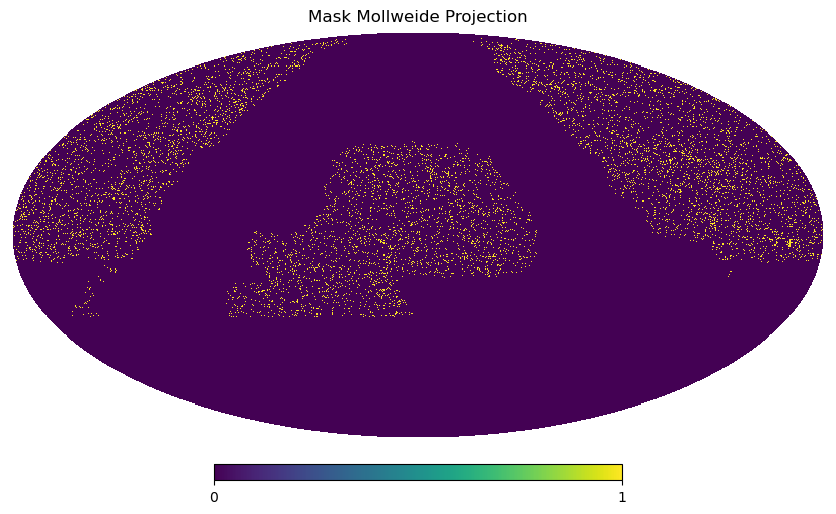

In [ ]:
hp.mollview(mask_data, title="Mask Mollweide Projection", cmap='viridis', nest=False,nrom='hist')

In [ ]:
print(np.count_nonzero(mask_data),len(mask_data))
pix_list=np.array(np.where(~np.in1d(np.where(mask_data),np.where(mask))))[0]

405989 12582912


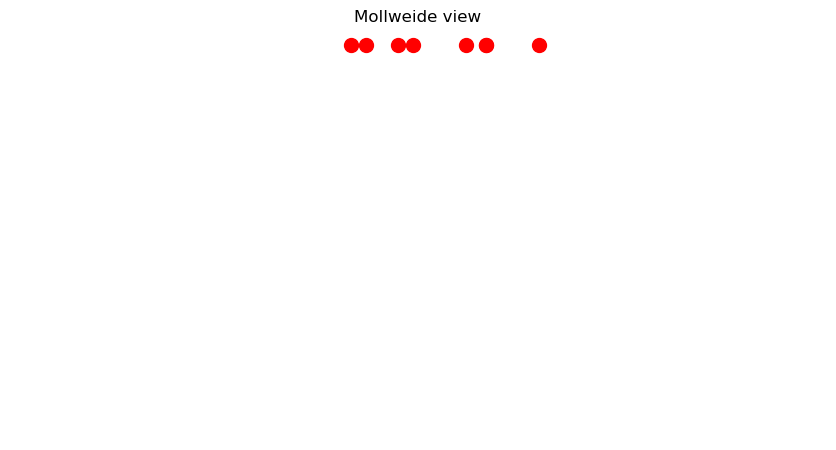

In [ ]:
m=np.zeros(npix)
m[pix_list] = 1

theta,phi = hp.pix2ang(nside, pix_list)
ra = np.degrees(phi)
dec= np.degrees(0.5*np.pi-theta)
hp.mollview(None,cbar=False)
hp.projplot(np.radians(90-dec),np.radians(ra),'ro',ms=10)
#plt.show()

(array([208.73493976, 275.24096386, 275.60240964, 299.81927711,
         25.02      ,   6.63346614,  64.72111554,  83.36653386]),
 array([78.60557803, 78.60557803, 78.60557803, 78.60557803, 78.55966496,
        78.51375006, 78.51375006, 78.51375006]))

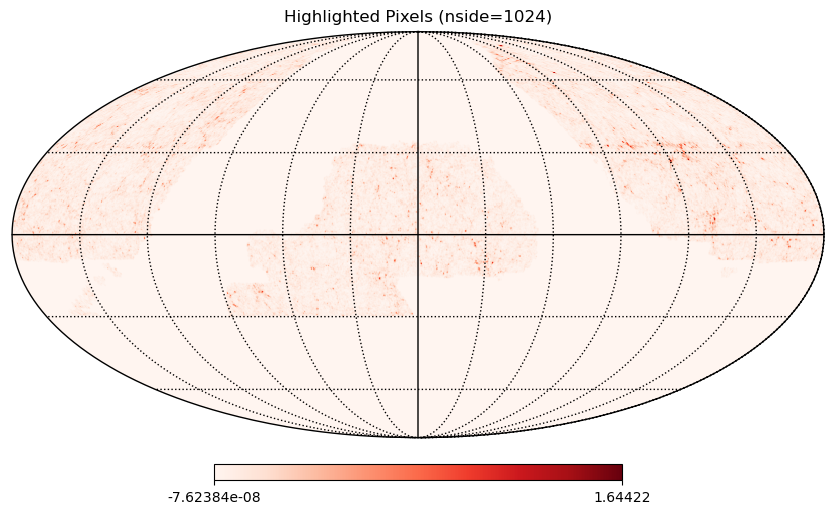

In [30]:
smoothed= hp.smoothing(m,fwhm=np.radians(0.5))
hp.mollview(smoothed, title="Highlighted Pixels (nside=1024)", cmap="Reds")
hp.graticule()
plt.show()